<a href="https://colab.research.google.com/github/Shyam-Khokhariya/Machine_Learning/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
len(y_train)

60000

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(y_test)

10000

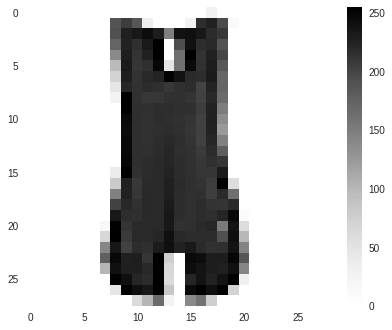

In [9]:
plt.figure()
plt.imshow(X_train[4])
plt.colorbar()
plt.grid(False)

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

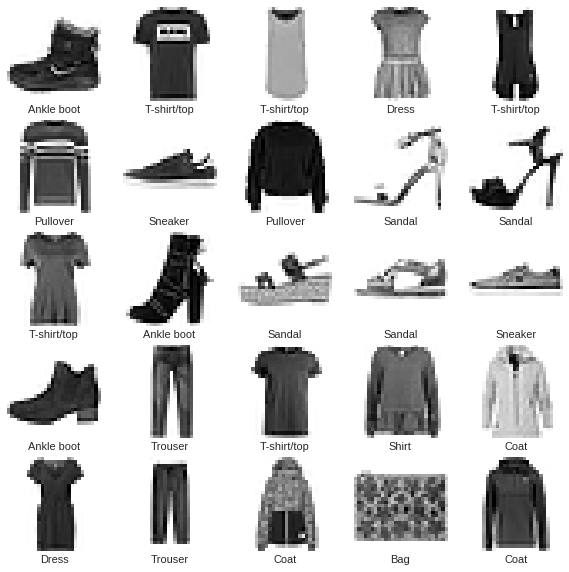

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [0]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128,activation=tf.nn.relu),
                       keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.5009 - acc: 0.8233
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3771 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.3386 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3128 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2955 - acc: 0.8906


In [15]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:',test_acc)

10000/10000 [==============================] - 0s 32us/step
Test accuracy: 0.8672


In [0]:
predictions=model.predict(X_test)

In [17]:
predictions[0]

array([5.9528946e-07, 1.3943849e-08, 4.1089680e-07, 1.4977904e-07,
       8.3576850e-07, 2.9446255e-02, 5.0334220e-06, 2.6261273e-01,
       8.2601582e-05, 7.0785141e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
y_test[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

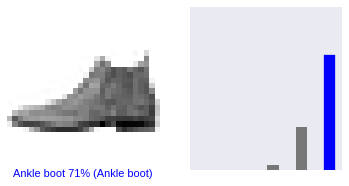

In [22]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,y_test,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predictions,y_test)

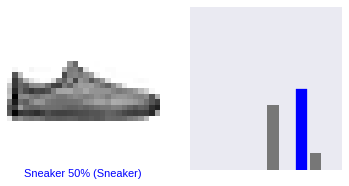

In [24]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,y_test,X_test)
plt.subplot(1,2,2)
plot_value_array(i,predictions,y_test)

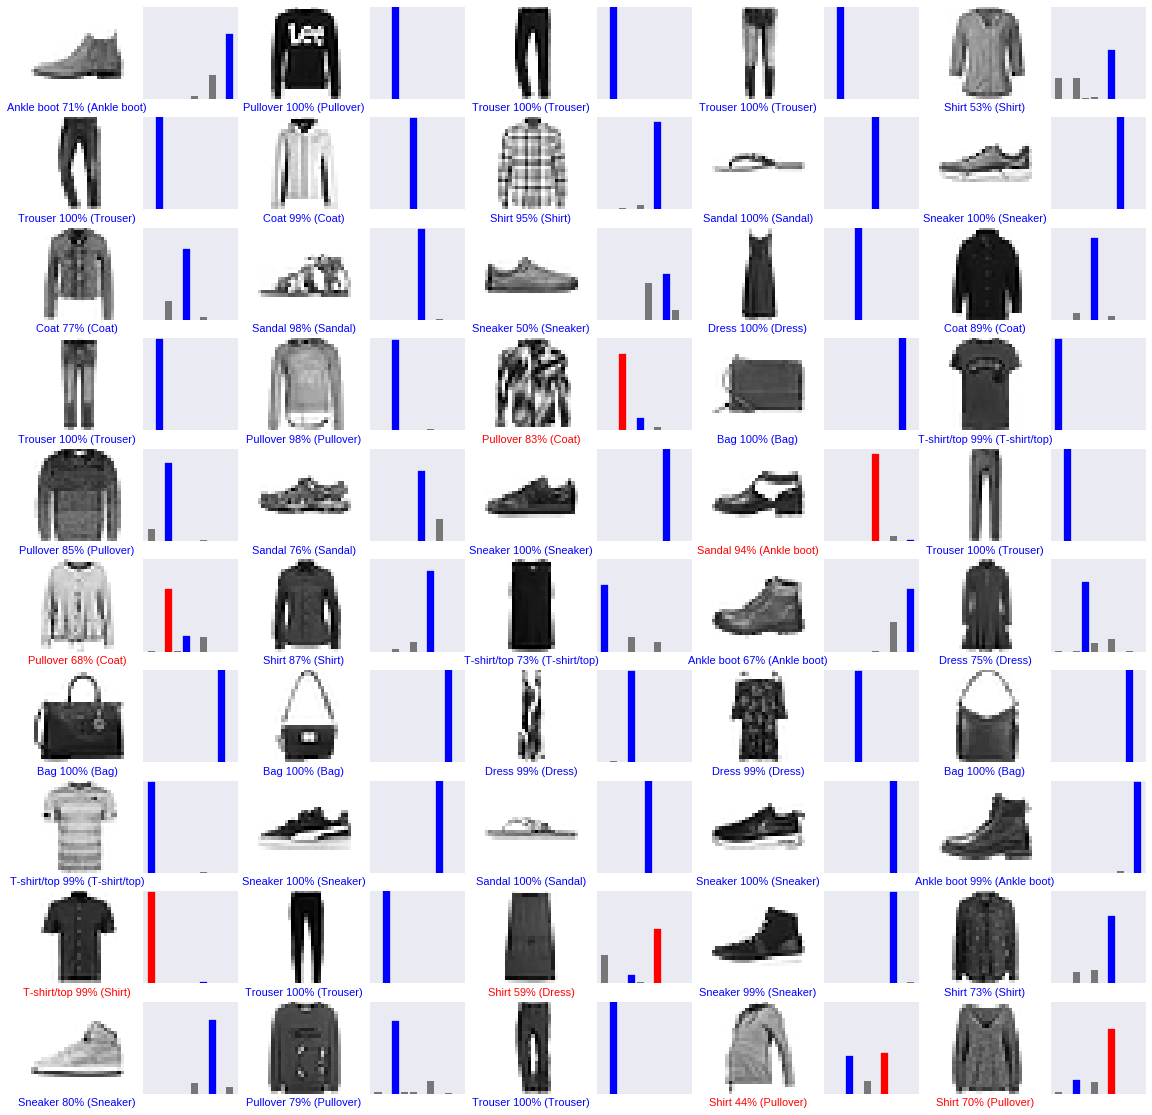

In [28]:
row=10
col=5
images=row*col
plt.figure(figsize=(4*col,2*row))
for i in range(images):
  plt.subplot(row,2*col,2*i+1)
  plot_image(i,predictions,y_test,X_test)
  plt.subplot(row,2*col,2*i+2)
  plot_value_array(i,predictions,y_test)

In [29]:
img=X_test[0]
print(img.shape)

(28, 28)


In [30]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.9529100e-07 1.3943845e-08 4.1089709e-07 1.4977914e-07 8.3576754e-07
  2.9446198e-02 5.0334156e-06 2.6261297e-01 8.2601720e-05 7.0785123e-01]]


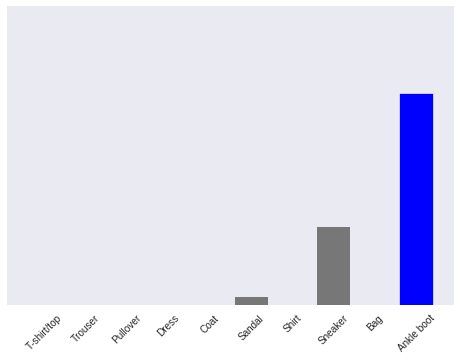

In [32]:
plot_value_array(0,predictions_single,y_test)
_ = plt.xticks(range(10),class_names,rotation=45)

In [33]:
np.argmax(predictions_single[0])

9